In [7]:
!pip install -q gdown

!gdown --folder --remaining-ok https://drive.google.com/drive/folders/1NADy3RRIFPnQZLmsVBsf_Q6QV_mPqe51

import numpy as np

Retrieving folder contents
Processing file 12ECd_BYYz3aOzQyPbKP4PiTEfyH3X1Rk freshness_id2label.json
Processing file 1t4zESKIgYYuiNioRUu1YeziDnzwDkG0G id2fruit_label.json
Processing file 1SOwtj_Sm3IY7MOkwchkVyXbFC-7J5AhA X.npy
Processing file 1JdnzD4zSD2eifrcVbvwStBOyiVEIGFDL y_freshness.npy
Processing file 1Kxh0teQ1Vb62pgCqoggSu1jcWTVplv77 y_fruit.npy
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=12ECd_BYYz3aOzQyPbKP4PiTEfyH3X1Rk
To: /content/Fresh_Rotten_Fruit_Dataset/freshness_id2label.json
100% 29.0/29.0 [00:00<00:00, 85.4kB/s]
Downloading...
From: https://drive.google.com/uc?id=1t4zESKIgYYuiNioRUu1YeziDnzwDkG0G
To: /content/Fresh_Rotten_Fruit_Dataset/id2fruit_label.json
100% 96.0/96.0 [00:00<00:00, 169kB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1SOwtj_Sm3IY7MOkwchkVyXbFC-7J5AhA
From (redirected): https://drive.google.com/uc?id=1SOwtj_Sm3IY7MOkwchk

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab.patches import cv2_imshow
import random
from sklearn.model_selection import train_test_split


In [9]:
X = np.load("Fresh_Rotten_Fruit_Dataset/X.npy")
y_fruit = np.load("Fresh_Rotten_Fruit_Dataset/y_fruit.npy")
y_freshness = np.load("Fresh_Rotten_Fruit_Dataset/y_freshness.npy")


random_state = 42
rng = np.random.RandomState(random_state)

idx = np.random.permutation(len(X))
X, y_fruit, y_freshness = X[idx], y_fruit[idx], y_freshness[idx]


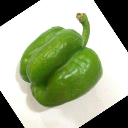

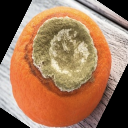

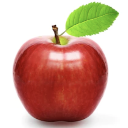

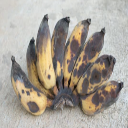

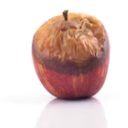

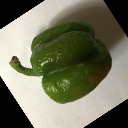

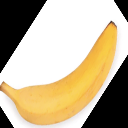

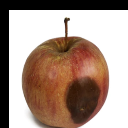

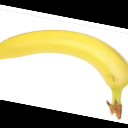

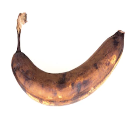

In [10]:

for i in range(10):
  idx = np.random.randint(0, X.shape[0])
  cv2_imshow(X[idx])



{0: 'apple', 1: 'banana', 2: 'bittergourd', 3: 'capsicum', 4: 'orange', 5: 'tomato'}
{0: 'fresh', 1: 'rotten'}


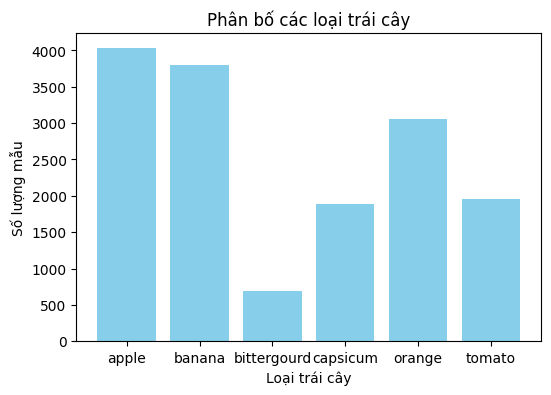

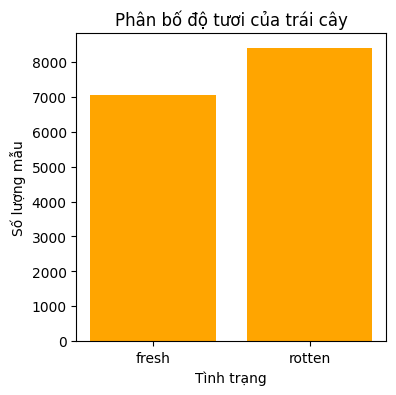

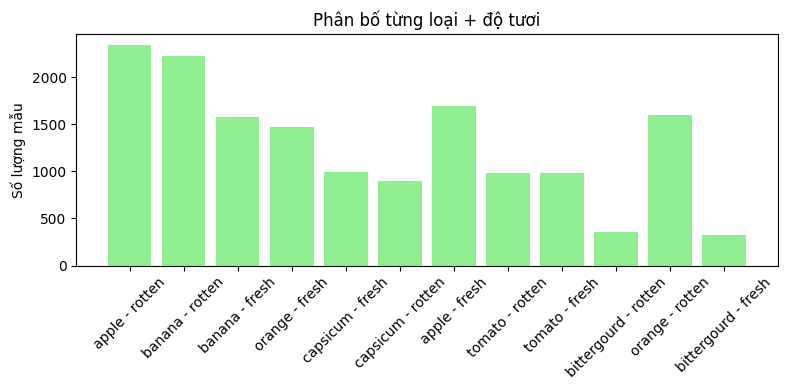

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import json

id2fruit_label = dict()
freshness_id2label = dict()

with open('/content/Fresh_Rotten_Fruit_Dataset/id2fruit_label.json', 'r') as f:
    id2fruit_label = json.load(f)

with open('/content/Fresh_Rotten_Fruit_Dataset/freshness_id2label.json', 'r') as f:
    freshness_id2label = json.load(f)

id2fruit_label = {int(k): v for k, v in id2fruit_label.items()}
freshness_id2label = {int(k): v for k, v in freshness_id2label.items()}

print(id2fruit_label)
print(freshness_id2label)


fruit_counts = Counter(y_fruit)
fruit_names = [id2fruit_label[i] for i in sorted(fruit_counts.keys())]
fruit_values = [fruit_counts[i] for i in sorted(fruit_counts.keys())]

plt.figure(figsize=(6,4))
plt.bar(fruit_names, fruit_values, color="skyblue")
plt.title("Phân bố các loại trái cây")
plt.ylabel("Số lượng mẫu")
plt.xlabel("Loại trái cây")
plt.show()

print()

freshness_counts = Counter(y_freshness)
freshness_names = [freshness_id2label[i] for i in sorted(freshness_counts.keys())]
freshness_values = [freshness_counts[i] for i in sorted(freshness_counts.keys())]

plt.figure(figsize=(4,4))
plt.bar(freshness_names, freshness_values, color="orange")
plt.title("Phân bố độ tươi của trái cây")
plt.ylabel("Số lượng mẫu")
plt.xlabel("Tình trạng")
plt.show()

print()

combo_counts = Counter(zip(y_fruit, y_freshness))
labels = [f"{id2fruit_label[f]} - {freshness_id2label[s]}" for f, s in combo_counts.keys()]
values = [combo_counts[(f, s)] for f, s in combo_counts.keys()]

plt.figure(figsize=(8,4))
plt.bar(labels, values, color="lightgreen")
plt.title("Phân bố từng loại + độ tươi")
plt.ylabel("Số lượng mẫu")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.utils import to_categorical

X = preprocess_input(X)

x_train, x_test, y_freshness_train, y_freshness_test, y_fruit_train, y_fruit_test = train_test_split(
    X, y_freshness, y_fruit, test_size=0.2, random_state=42, stratify=y_fruit
)





y_freshness_train = to_categorical(y_freshness_train)
y_freshness_test  = to_categorical(y_freshness_test)

y_fruit_train = to_categorical(y_fruit_train)
y_fruit_test  = to_categorical(y_fruit_test)

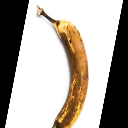

None


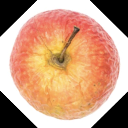

None


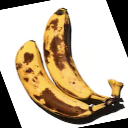

None


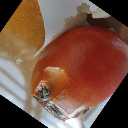

None


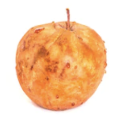

None


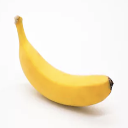

None


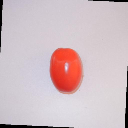

None


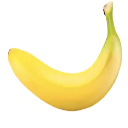

None


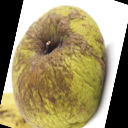

None


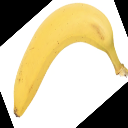

None


In [17]:
for _ in range(10):
  idx = np.random.randint(0, x_train.shape[0])
  print(cv2_imshow(x_train[idx]))

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split

In [25]:
input_shape = (128, 128, 3)
n_fruits_classes = y_fruit_train.shape[1]
n_freshness_classes = y_freshness_train.shape[1]

inputs = Input(shape=input_shape)
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_tensor=inputs)
base_model.trainable = False

shared = GlobalAveragePooling2D()(base_model.output)
shared = Dropout(0.3)(shared)
shared = Dense(512, activation='relu')(shared)
shared = Dropout(0.3)(shared)

fruit_branch = Dense(128, activation='relu')(shared)
fruit_branch = Dropout(0.3)(fruit_branch)
fruit_output = Dense(n_fruits_classes, activation='softmax',
                     name='fruit_output')(fruit_branch)

freshness_branch = Dense(64, activation='relu')(shared)
freshness_branch = Dropout(0.2)(freshness_branch)
freshness_output = Dense(n_freshness_classes, activation='softmax',
                         name='freshness_output')(freshness_branch)


model = Model(inputs=inputs, outputs=[fruit_output, freshness_output])


In [27]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss={
        'fruit_output': 'categorical_crossentropy',
        'freshness_output': 'categorical_crossentropy'
    },
    metrics={
        'fruit_output': 'accuracy',
        'freshness_output': 'accuracy'
    }
)

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_10        │ (None, 128, 128,  │          0 │ input_layer_5[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_5     │ (None, 128, 128,  │          7 │ rescaling_10[0][… │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_11        │ (None, 128, 128,  │          0 │ normalization_5[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 129, 129,  │          0 │ rescaling_11[0][… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 64, 64,    │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 64, 64,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 64, 64,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 64, 64,    │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 64, 64,    │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 64, 64,    │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 64, 64,    │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 64, 64,    │        512 │ block1a_se_excit

 Total params: 4,804,843 (18.33 MB)

 Trainable params: 755,272 (2.88 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [28]:
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1,
    mode='min',
    min_lr=1e-6
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    mode='min',
    restore_best_weights=True
)

In [30]:
print(x_train.shape)
print(y_fruit_train.shape)
print(y_freshness_train.shape)

print(x_test.shape)
print(y_fruit_test.shape)
print(y_freshness_test.shape)

(12351, 128, 128, 3)
(12351, 6)
(12351, 2)
(3088, 128, 128, 3)
(3088, 6)
(3088, 2)


In [45]:
history = model.fit(
    x_train,
    {'fruit_output': y_fruit_train, 'freshness_output': y_freshness_train},
    validation_data=(x_test, {'fruit_output': y_fruit_test, 'freshness_output': y_freshness_test}),
    epochs=20,
    callbacks=[lr_scheduler, early_stop]
)

Epoch 1/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 447s 1s/step - freshness_output_accuracy: 0.7453 - freshness_output_loss: 0.4974 - fruit_output_accuracy: 0.6791 - fruit_output_loss: 0.8959 - loss: 1.3932 - val_freshness_output_accuracy: 0.9398 - val_freshness_output_loss: 0.1578 - val_fruit_output_accuracy: 0.9770 - val_fruit_output_loss: 0.0806 - val_loss: 0.2374 - learning_rate: 1.0000e-04
Epoch 2/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 425s 1s/step - freshness_output_accuracy: 0.9265 - freshness_output_loss: 0.1954 - fruit_output_accuracy: 0.9560 - fruit_output_loss: 0.1431 - loss: 0.3384 - val_freshness_output_accuracy: 0.9624 - val_freshness_output_loss: 0.1057 - val_fruit_output_accuracy: 0.9867 - val_fruit_output_loss: 0.0427 - val_loss: 0.1473 - learning_rate: 1.0000e-04
Epoch 3/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 399s 1s/step - freshness_output_accuracy: 0.9385 - freshness_output_loss: 0.1549 - fruit_output_accuracy: 0.9676 - fruit_output_loss: 0.0925 - loss: 0.2474 - val_freshness_output_accurac

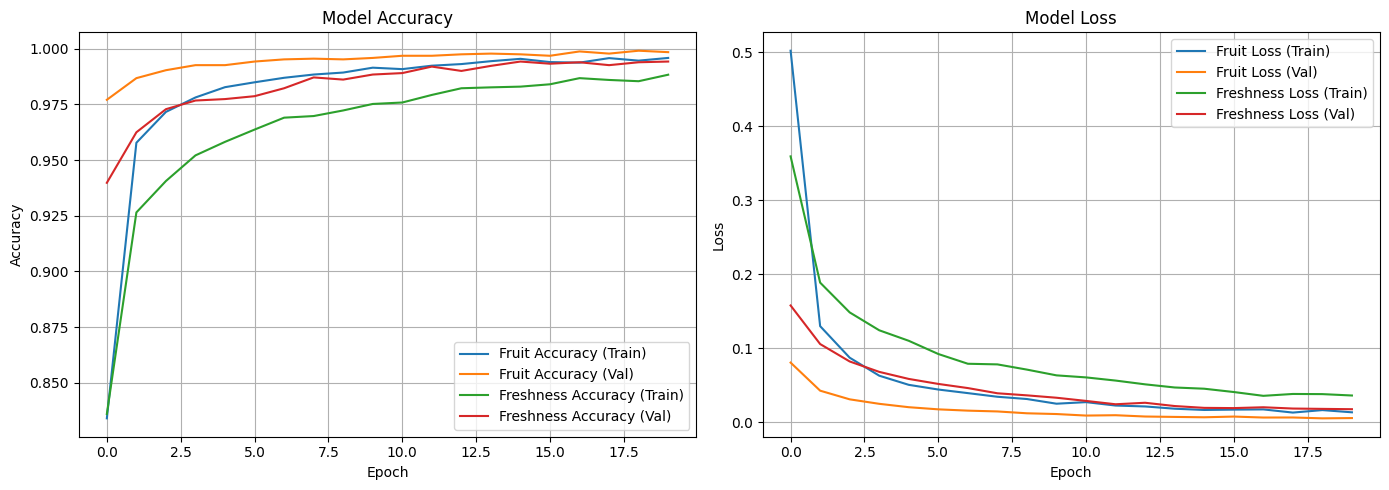

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))


axs[0].plot(history.history['fruit_output_accuracy'], label='Fruit Accuracy (Train)')
axs[0].plot(history.history['val_fruit_output_accuracy'], label='Fruit Accuracy (Val)')
axs[0].plot(history.history['freshness_output_accuracy'], label='Freshness Accuracy (Train)')
axs[0].plot(history.history['val_freshness_output_accuracy'], label='Freshness Accuracy (Val)')
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].grid(True)


axs[1].plot(history.history['fruit_output_loss'], label='Fruit Loss (Train)')
axs[1].plot(history.history['val_fruit_output_loss'], label='Fruit Loss (Val)')
axs[1].plot(history.history['freshness_output_loss'], label='Freshness Loss (Train)')
axs[1].plot(history.history['val_freshness_output_loss'], label='Freshness Loss (Val)')
axs[1].set_title('Model Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [46]:
model.save('fruit_freshness_model.h5')

In [48]:
def preprocess_image(img):
    img = cv2.resize(img, (128, 128))
    return np.expand_dims(img, axis=0)

In [50]:

def predict(img_1):
  cv2_imshow(img_1)
  img = preprocess_image(img_1)
  cv2_imshow(img[0])

  pred_fruit, pred_freshness = model.predict(img)
  fruit_label = np.argmax(pred_fruit)
  freshness_label = np.argmax(pred_freshness)
  print("Fruit:", fruit_dict[str(fruit_label)])
  print("Freshness:", freshness_dict[str(freshness_label)])
